## Observations and Insights 

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results & drop duplicates
mouse_metadata = pd.read_csv(mouse_metadata_path).drop_duplicates()
study_results = pd.read_csv(study_results_path).drop_duplicates()

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='right')

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,25,63.145652,2
1888,z969,Naftisol,Male,9,30,30,65.841013,3
1889,z969,Naftisol,Male,9,30,35,69.176246,4
1890,z969,Naftisol,Male,9,30,40,70.314904,4


In [74]:
# Checking the number of mice.
num_mice = merged_data['Mouse ID']
mice = len(num_mice)
mice

1892

In [75]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [76]:
dup_data = merged_data['Mouse ID'] == 'g989'

In [77]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicate_data = merged_data[dup_data]
mouse_duplicate_data.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,5,48.786801,0
910,g989,Propriva,Female,21,26,5,47.570392,0
911,g989,Propriva,Female,21,26,10,51.745156,0
912,g989,Propriva,Female,21,26,10,49.880528,0


In [78]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merged_data[merged_data["Mouse ID"].isin(duplicate_mice) == False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,25,63.145652,2
1888,z969,Naftisol,Male,9,30,30,65.841013,3
1889,z969,Naftisol,Male,9,30,35,69.176246,4
1890,z969,Naftisol,Male,9,30,40,70.314904,4


In [79]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df['Mouse ID'].value_counts()
Cmice = len(clean_mice)
Cmice

248

## Summary Statistics

In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_regimen = clean_df.groupby(['Drug Regimen'])
tumor_regimen

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = tumor_regimen["Tumor Volume (mm3)"].mean()
tumor_median = tumor_regimen["Tumor Volume (mm3)"].median()
tumor_variance = tumor_regimen["Tumor Volume (mm3)"].var()
tumor_stddev = tumor_regimen["Tumor Volume (mm3)"].std()
tumor_SEM = tumor_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
tumor_sum = pd.DataFrame({"Mean": tumor_mean,
                         "Median": tumor_median,
                         "Variance": tumor_variance,
                         "Std Deviation": tumor_stddev,
                         "SEM": tumor_SEM})
tumor_sum


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [81]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_agg = tumor_regimen["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumor_agg.columns = ["Mean", "Median", "Variance", "Std Deviation", "SEM"]
tumor_agg


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

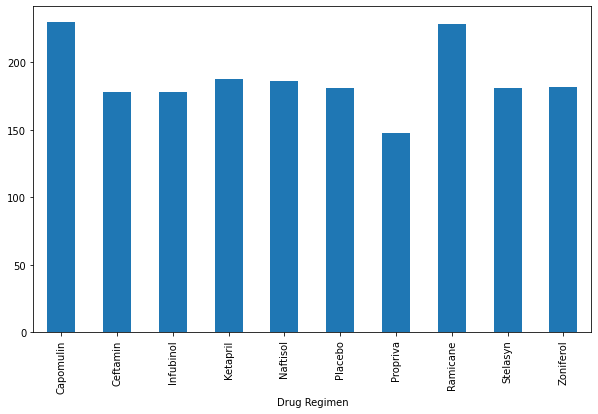

In [82]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
clean_df.groupby(['Drug Regimen'])["Timepoint"].count().plot(kind = "bar")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

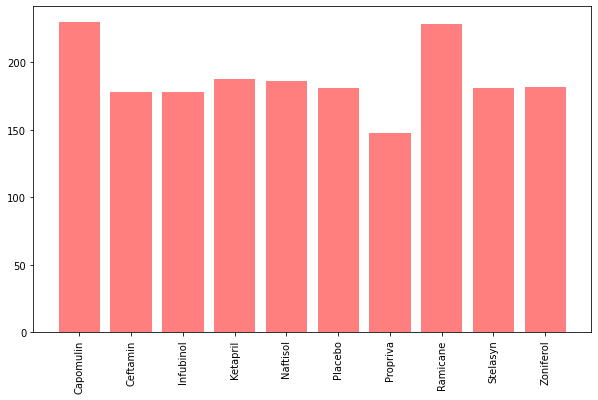

In [83]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints_pyplot = clean_df.groupby(['Drug Regimen'])["Timepoint"].count()

plt.bar(timepoints_pyplot.index, timepoints_pyplot.values, color='r', alpha=0.5, align="center")
plt.xticks(rotation = "vertical")

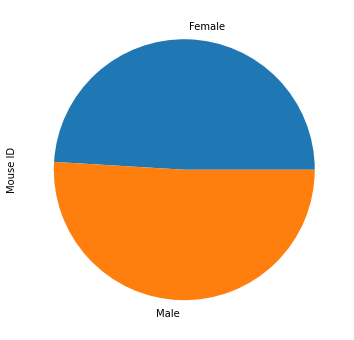

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df.groupby(['Sex'])["Mouse ID"].count().plot(kind = "pie")

([<matplotlib.patches.Wedge at 0x1a81acf0b70>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')])

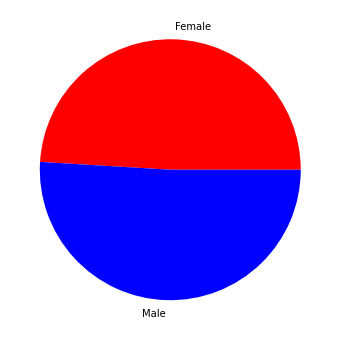

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
timepoints_pyplot = clean_df.groupby(['Sex'])["Mouse ID"].count()


plt.pie(timepoints_pyplot.values, labels=timepoints_pyplot.index, colors=["red","blue"]) 


## Quartiles, Outliers and Boxplots

In [86]:
# # # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # # Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") |
                           (clean_df["Drug Regimen"] == "Ramicane") |
                           (clean_df["Drug Regimen"] == "Ceftamin") |
                           (clean_df["Drug Regimen"] == "Propriva"), :]

final_tumor_vol = filtered_df.groupby(["Mouse ID"])
final_tumor_vol["Timepoint"].max()

# # # Start by getting the last (greatest) timepoint for each mouse
final_tumor_vol_df = final_tumor_vol["Timepoint"].max().to_frame()
final_tumor_vol_df

# # # Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_tumor_vol_df = final_tumor_vol_df.merge(filtered_df, right_on= "Mouse ID", left_on="Mouse ID", suffixes= ("_max",None))
final_tumor_vol_df

final_tumor_vol_df[final_tumor_vol_df["Timepoint_max"]==final_tumor_vol_df["Timepoint"]]

# Determine quartiles
quartiles = final_tumor_vol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print a filtered dataframe of any outliers
outliers_df = final_tumor_vol_df.loc[(final_tumor_vol_df['Tumor Volume (mm3)'] > upper_bound) | (final_tumor_vol_df['Tumor Volume (mm3)'] < lower_bound), :]
outliers_df

,Mouse ID,Timepoint_max,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,a275,45,Ceftamin,Female,20,28,45,62.999356,3
119,c927,40,Propriva,Female,4,26,40,64.183229,4
186,g570,45,Propriva,Male,16,29,40,68.525856,2
187,g570,45,Propriva,Male,16,29,45,70.492788,2
305,k210,45,Ceftamin,Male,15,28,35,63.329330,1
306,k210,45,Ceftamin,Male,15,28,40,66.622836,2
307,k210,45,Ceftamin,Male,15,28,45,68.923185,3
316,k403,45,Ramicane,Male,21,16,40,24.365505,1
317,k403,45,Ramicane,Male,21,16,45,22.050126,1
334,l471,45,Ceftamin,Female,7,28,40,63.844858,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1a81ad3ab70>,
 'caps': [<matplotlib.lines.Line2D at 0x1a81ad472b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a81ad3a828>],
 'medians': [<matplotlib.lines.Line2D at 0x1a81ad479b0>],
 'fliers': [],
 'means': []}

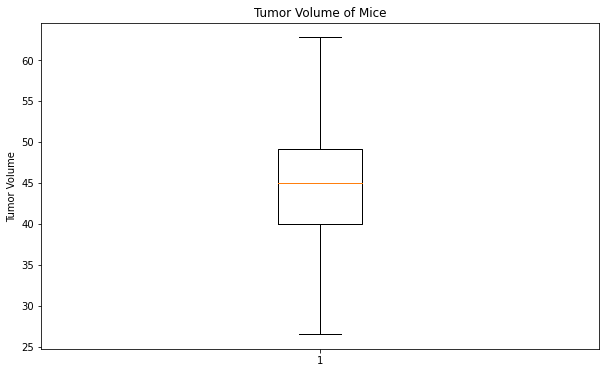

In [87]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol = final_tumor_vol_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tumor_vol, showfliers=False)


## Line and Scatter Plots

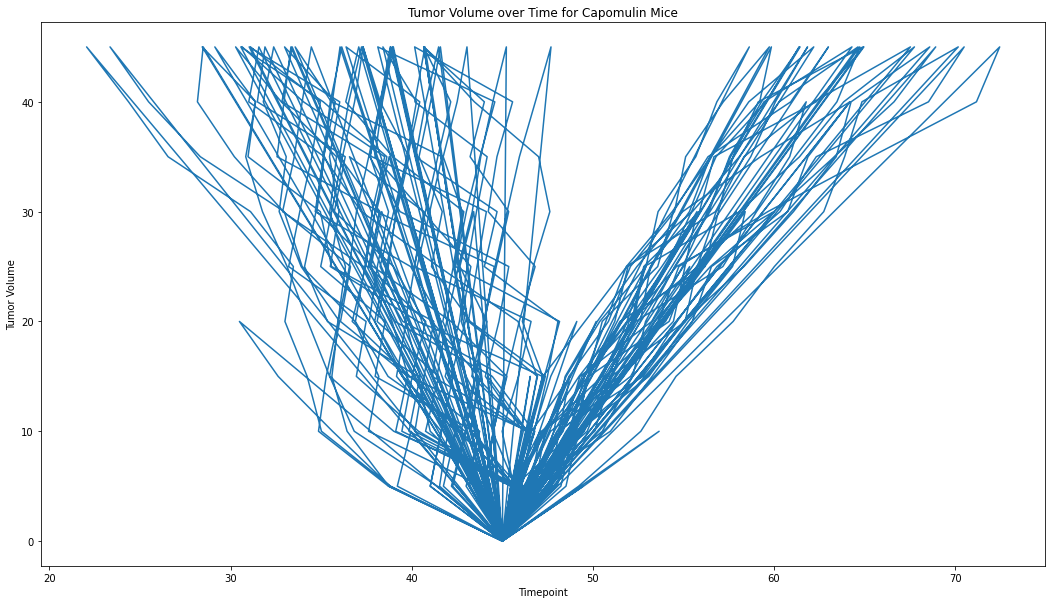

In [99]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


# Plot the tumor volume for various mice
fig, ax = plt.subplots(figsize = (18,10))
plt.plot(final_tumor_vol_df['Tumor Volume (mm3)'], final_tumor_vol_df['Timepoint'])


# Show the chart, add labels
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume over Time for Capomulin Mice')
plt.show() 

# fig, ax = plt.subplots(figsize = (18,10))
# ax.scatter(final_tumor_vol_df['INDUS'], df_boston['TAX'])
  
# # x-axis label
# ax.set_xlabel('(Proportion non-retail business acres)/(town)')
  
# # y-axis label
# ax.set_ylabel('(Full-value property-tax rate)/( $10,000)')
# plt.show()

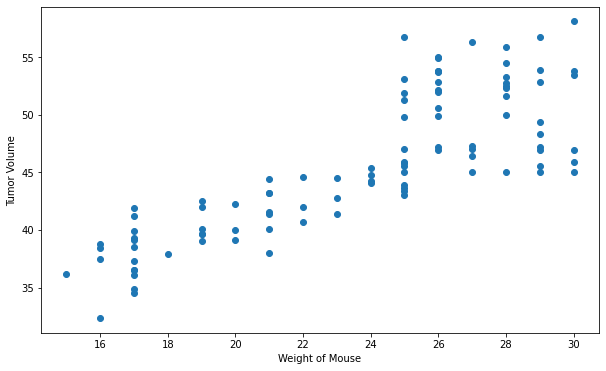

In [100]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight = final_tumor_vol_df.groupby(final_tumor_vol_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = final_tumor_vol_df.groupby(final_tumor_vol_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Create Scatter Plot with values calculated above
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

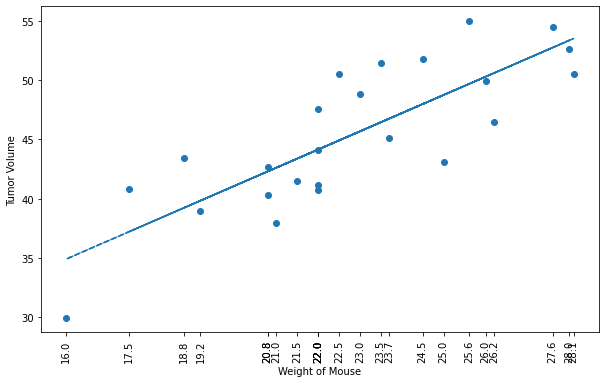

The correlation between weight and tumor value is 0.81


In [101]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = final_tumor_vol_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = final_tumor_vol_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform a linear regression on year versus violent crime rate
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
      
# Create equation of line to calculate predicted violent crime rate
fit = slope * mouse_weight + int

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {corr}')